In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [63]:
def fetch_dataset(key, dataset_name):
    cmd = !gdown --fuzzy {key} -O {dataset_name}
    path = pd.Series(cmd).str.extractall(r'(To.*)').reset_index()[0].iloc[0].split(': ')[1]
    return path

In [68]:
path = fetch_dataset("1HdJj68eO9NTZlpwZcLYqdtPqrbKs1cxj", "amazon_purchases.csv")

In [65]:
path

'C:\\Users\\rohit\\5010\\project\\AmazonSalesPredictor\\amazon_purchases.csv'

In [66]:
df = pd.read_csv(path)

In [67]:
df.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF
2,2018-12-24,8.99,1.0,NJ,NaN,B078JZTFN3,NaN,R_01vNIayewjIIKMF
3,2018-12-25,10.45,1.0,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF
4,2018-12-25,10.00,1.0,NJ,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF


In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [23]:
df['total cost'] = df['Purchase Price Per Unit']*df['Quantity']

In [33]:
p = df.groupby('Order Date')['total cost'].mean()

In [26]:
df.groupby('Order Date').first().index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2023-03-19', '2023-03-20', '2023-03-21', '2023-03-22',
               '2023-05-02', '2023-06-01', '2023-06-02', '2023-07-03',
               '2023-09-01', '2024-08-15'],
              dtype='datetime64[ns]', name='Order Date', length=1913, freq=None)

In [35]:
p

Order Date
2018-01-01    26.386635
2018-01-02    26.306216
2018-01-03    23.175859
2018-01-04    24.504271
2018-01-05    30.767858
                ...    
2023-06-01    20.188000
2023-06-02    14.990000
2023-07-03    14.410000
2023-09-01    19.950000
2024-08-15     1.840000
Name: total cost, Length: 1913, dtype: float64

<Axes: xlabel='Order Date'>

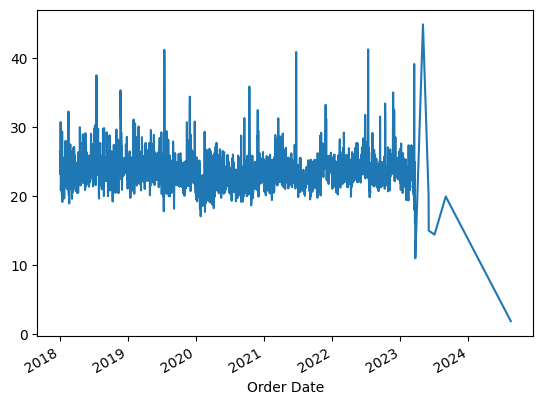

In [34]:
p.plot()

In [42]:
df.groupby('Survey ResponseID')['total cost'].sum()

Survey ResponseID
R_01vNIayewjIIKMF     4920.01
R_037XK72IZBJyF69    17589.89
R_038ZU6kfQ5f89fH     4247.54
R_03aEbghUILs9NxD     3882.98
R_06RZP9pS7kONINr    11223.70
                       ...   
R_zd4E1BgAdaM2761    13533.96
R_zdLOP8JD2pe1brj     6397.19
R_zdQYFhfeqyBd2dH     6154.57
R_zfnsck2ZatnGtY5    10880.95
R_zfqnsBzlOAKibzb     2688.19
Name: total cost, Length: 5027, dtype: float64